# Practical 2

### [Radzim Sendyka](https://www.cst.cam.ac.uk/people/rs2071), University

of Cambridge

### [Christian Cabrera](https://www.cst.cam.ac.uk/people/chc79), University

of Cambridge

### [Carl Henrik Ek](http://carlhenrik.com), University of Cambridge

### [Neil D. Lawrence](http://inverseprobability.com), University of

Cambridge

### 2024-11-07

**Abstract**: In this lab session we look at working with geospatial
data, in conjunction with the house prices dataset you created in the
previous practicals.

$$
$$

::: {.cell .markdown}

<!-- Do not edit this file locally. -->
<!-- Do not edit this file locally. -->
<!---->
<!-- Do not edit this file locally. -->
<!-- Do not edit this file locally. -->
<!-- The last names to be defined. Should be defined entirely in terms of macros from above-->
<!--

-->

**The check Session for this Practical is 12th November 2024.**
Prerequisite: practical 1, and a working database with tables price paid
data (i.e., `pp_data`) and postcodes(i.e., `postcode_data`)

In this lab session we look at working with geospacial data, in
conjunction with the house prices dataset you created in the previous
practicals. The goal is to enrich the data from the first practical with
geographic data enabling better informed data analysis. Access to the
price paid database is needed to complete some of the below exercises.
You are asked to write reusable code that will help you in the
assessment.

## Accessing Open Street Maps

<span class="editsection-bracket"
style="">\[</span><span class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_datasets/includes/accessing-osm.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_datasets/includes/accessing-osm.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

[Open Street Maps
(OSM)](https://www.openstreetmap.org/#map=6/54.91/-3.43) is an open
geographic database that can provide useful information about different
locations and places in the planet. In this example, we will download
data about the city of Kampala, Uganda. As always, we should start by
installing some Python packages.

In [1]:
%pip install osmnx

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip uninstall --yes matplotlib

Found existing installation: matplotlib 3.9.2
Uninstalling matplotlib-3.9.2:
  Successfully uninstalled matplotlib-3.9.2
Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install matplotlib==3.7.1

  Using cached matplotlib-3.7.1-cp311-cp311-macosx_11_0_arm64.whl.metadata (5.6 kB)
Using cached matplotlib-3.7.1-cp311-cp311-macosx_11_0_arm64.whl (7.3 MB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
import osmnx as ox
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module='osmnx')

We will download data of Kamplala, Uganda, which has the following
latitude and longitude.

In [5]:
place_name = "Kampala, Uganda"

latitude = 0.347596 # Kampala latitude
longitude = 32.582520 # Kampala longitude

In [6]:
placestub = place_name.lower().replace(' ', '-').replace(',','')

We’ll create a bounding box which is 0.02 degrees wide, 1 degree is
around 111km ([circumference of the Earth is around 40,000
km](https://en.wikipedia.org/wiki/Metre) and 40,000/360=111km). Note:
will this approximation work well in all countries?

In [7]:
box_width = 0.02 # About 2.2 km
box_height = 0.02
north = latitude + box_height/2
south = latitude - box_width/2
west = longitude - box_width/2
east = longitude + box_width/2

Now we’ll download a set of points of interest from OpenStreetMap. We
can specify the points of interest we’re interested in by building a
small dictionary containing their labels as follows. A Point of Interest
is a location with certain importance in the geographic area. They can
vary from amenities to touristic places as you can see in the following.

In [8]:
# Retrieve POIs
tags = {
    "amenity": True,
    "buildings": True,
    "historic": True,
    "leisure": True,
    "shop": True,
    "tourism": True,
    "religion": True,
    "memorial": True
}

We can use `osmnx` to download all such points of interest within a
given bounding box.

In [9]:
pois = ox.features_from_bbox((west, south, east, north), tags)

That operation can take some time, particularly as the bounding box
grows larger. Once it is complete we can check how many points of
interest we have found.

In [10]:
print("There are {number} points of interest surrounding {placename} latitude: {latitude}, longitude: {longitude}".format(number=len(pois), placename=place_name, latitude=latitude, longitude=longitude))

There are 880 points of interest surrounding Kampala, Uganda latitude: 0.347596, longitude: 32.58252


And then we can examine their contents in more detail.

In [11]:
pois

geometry  \
element id                                                              
node    599171967                             POINT (32.5883 0.33888)   
        599171968                            POINT (32.58734 0.33821)   
        599171969                            POINT (32.58817 0.33865)   
        599171971                            POINT (32.58793 0.33845)   
        601370312                            POINT (32.58904 0.34189)   
...                                                               ...   
way     1156972448  POLYGON ((32.59044 0.34826, 32.59079 0.34818, ...   
        1156972449  POLYGON ((32.59025 0.34807, 32.59037 0.34829, ...   
        1156972454  POLYGON ((32.5912 0.34825, 32.59121 0.34818, 3...   
        1156972457  POLYGON ((32.59168 0.34846, 32.59168 0.34837, ...   
        1156972468  POLYGON ((32.59155 0.34854, 32.59155 0.34839, ...   

                   addr:housenumber  addr:street      amenity  cuisine  \
element id                                                               
node    599171967           Plot 21  Cooper Road   restaurant  mexican   
        599171968               NaN          NaN          NaN      NaN   
        599171969               NaN          NaN          NaN      NaN   
        599171971               NaN          NaN     pharmacy      NaN   
        601370312               NaN          NaN         fuel      NaN   
...                             ...          ...          ...      ...   
way     1156972448              NaN          NaN  marketplace      NaN   
        1156972449              NaN          NaN  marketplace      NaN   
        1156972454              NaN          NaN  marketplace      NaN   
        1156972457              NaN          NaN  marketplace      NaN   
        1156972468              NaN          NaN  marketplace      NaN   

                                       name            phone  \
element id                                                     
node    599171967                  Que Pasa  +256 783 874469   
        599171968    Millennium Supermarket              NaN   
        599171969                  Checkers              NaN   
        599171971   Makro Pharmacy (U) Ltd.              NaN   
        601370312                     Kobil              NaN   
...                                     ...              ...   
way     1156972448                      NaN              NaN   
        1156972449                      NaN              NaN   
        1156972454                      NaN              NaN   
        1156972457                      NaN              NaN   
        1156972468                      NaN              NaN   

                                                              website  \
element id                                                              
node    599171967             https://www.facebook.com/quepasakampala   
        599171968   http://www.millenniumsupermarket.com/profile.html   
        599171969                                                 NaN   
        599171971                                                 NaN   
        601370312                                                 NaN   
...                                                               ...   
way     1156972448                                                NaN   
        1156972449                                                NaN   
        1156972454                                                NaN   
        1156972457                                                NaN   
        1156972468                                                NaN   

                           shop  brand  ... roof:shape community_centre  \
element id                              ...                               
node    599171967           NaN    NaN  ...        NaN              NaN   
        599171968   supermarket    NaN  ...        NaN              NaN   
        599171969   supermarket    NaN  ...        NaN           

### We notice a few things:

1.  Points of interest do not have a consistent OpenStreetMap
    `element_type`, some are `node`, others are `relation` and we also
    have `way`. You can find out more about elements in OpenStreetMap on
    [this wiki page](https://wiki.openstreetmap.org/wiki/Elements). This
    will become important when tidying up the data for next stage
    processing.

2.  Many of the values are missing. In SQL we would express a missing
    value as `NULL`. But in `pandas` a missing value is expressed as
    not-a-number, `NaN`. This is quite a common standard, but it is not
    the only standard. Sometimes data is collected and coded with an
    “unreasonable” value for a missing value. For example, someone might
    set missing values for heights to -999. The concept is that this is
    an obviously void “height” and would trigger a human user to check
    whether it’s a missing value. Of course, this is obvious to humans,
    but not necessarily to a computer!

Nodes, ways and relations in OpenStreetMap all have different *keys*
associated with them. The data is not structured in standard database
columns. Different points of interest might have different keys present
or absent. We might be interested in the following keys.

In [12]:
keys = ["name",
        "addr:city",
        "addr:postcode",
        "amenity",
        "building",
        "building:name",
        "building:colour",
        "building:material",
        "historic",
        "memorial",
        "religion",
        "tourism",
        "emergency",
        "leisure",
        "shop"]

But our downloaded `gdf` may have fewer keys.

In [13]:
pois.columns.values

array(['geometry', 'addr:housenumber', 'addr:street', 'amenity',
       'cuisine', 'name', 'phone', 'website', 'shop', 'brand',
       'brand:wikidata', 'brand:wikipedia', 'compressed_air',
       'opening_hours', 'wheelchair', 'access', 'capacity', 'parking',
       'healthcare', 'addr:city', 'addr:country', 'branch', 'note',
       'designation', 'fee', 'diet:halal', 'diet:kosher',
       'payment:credit_cards', 'payment:debit_cards', 'diet:vegan',
       'diet:vegetarian', 'internet_access', 'outdoor_seating',
       'operator', 'alt_name', 'drive_through', 'level', 'takeaway',
       'email', 'tourism', 'contact:email', 'contact:facebook',
       'contact:instagram', 'contact:phone', 'check_date:opening_hours',
       'internet_access:fee', 'operator:wikidata', 'atm', 'facebook',
       'network', 'short_name', 'check_date', 'fixme', 'addr:suburb',
       'office', 'leisure', 'sport', 'lit', 'supervised', 'surface',
       'covered', 'addr:flats', 'beauty', 'payment:cards', 'paymen

We can write a short piece of code to discover which keys are missing
drom the data frame’s columns.

In [14]:
for key in keys:
    if key not in pois.columns:
        print(key)

present_keys = [key for key in keys if key in pois.columns]
pois[present_keys]

building:name
building:colour
historic
memorial


name addr:city addr:postcode  \
element id                                                            
node    599171967                  Que Pasa       NaN           NaN   
        599171968    Millennium Supermarket       NaN           NaN   
        599171969                  Checkers       NaN           NaN   
        599171971   Makro Pharmacy (U) Ltd.       NaN           NaN   
        601370312                     Kobil       NaN           NaN   
...                                     ...       ...           ...   
way     1156972448                      NaN       NaN           NaN   
        1156972449                      NaN       NaN           NaN   
        1156972454                      NaN       NaN           NaN   
        1156972457                      NaN       NaN           NaN   
        1156972468                      NaN       NaN           NaN   

                        amenity building building:material religion tourism  \
element id                                                                    
node    599171967    restaurant      NaN               NaN      NaN     NaN   
        599171968           NaN      NaN               NaN      NaN     NaN   
        599171969           NaN      NaN               NaN      NaN     NaN   
        599171971      pharmacy      NaN               NaN      NaN     NaN   
        601370312          fuel      NaN               NaN      NaN     NaN   
...                         ...      ...               ...      ...     ...   
way     1156972448  marketplace      NaN               NaN      NaN     NaN   
        1156972449  marketplace      NaN               NaN      NaN     NaN   
        1156972454  marketplace      NaN               NaN      NaN     NaN   
        1156972457  marketplace      NaN               NaN      NaN     NaN   
        1156972468  marketplace      NaN               NaN      NaN     NaN   

                   emergency leisure         shop  
element id                                         
node    599171967        NaN     NaN          NaN  
        599171968        NaN     NaN  supermarket  
        599171969        NaN     NaN  supermarket  
        599171971        NaN     NaN          NaN  
        601370312        NaN     NaN          NaN  
...                      ...     ...          ...  
way     1156972448       NaN     NaN          NaN  
        1156972449       NaN     NaN          NaN  
        1156972454       NaN     NaN          NaN  
        1156972457       NaN     NaN          NaN  
        1156972468       NaN     NaN          NaN  

[880 rows x 11 columns]

This gives us the relevant points of interest (part of the map). If we’d
like to see the entire street network, we can download the entire graph
from the location.

In [15]:
graph = ox.graph_from_bbox((west, south, east, north))

# Retrieve nodes and edges
nodes, edges = ox.graph_to_gdfs(graph)

# Get place boundary related to the place name as a geodataframe
area = ox.geocode_to_gdf(place_name)

Which we can then render as follows.

In [16]:
import matplotlib.pyplot as plt

!pip install --upgrade matplotlib

  Using cached matplotlib-3.9.2-cp311-cp311-macosx_11_0_arm64.whl.metadata (11 kB)
Using cached matplotlib-3.9.2-cp311-cp311-macosx_11_0_arm64.whl (7.8 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1


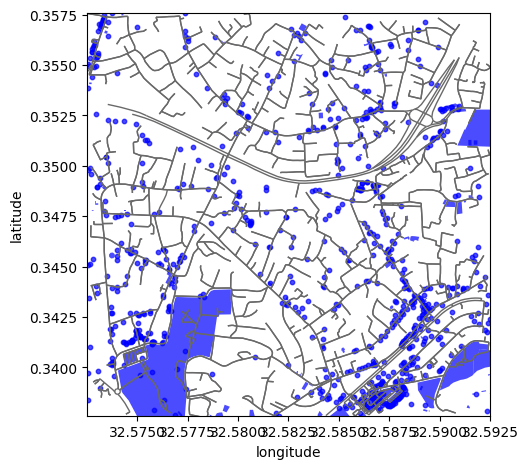

In [17]:
fig, ax = plt.subplots()

# Plot the footprint
area.plot(ax=ax, facecolor="white")

# Plot street edges
edges.plot(ax=ax, linewidth=1, edgecolor="dimgray")

ax.set_xlim([west, east])
ax.set_ylim([south, north])
ax.set_xlabel("longitude")
ax.set_ylabel("latitude")

# Plot all POIs
pois.plot(ax=ax, color="blue", alpha=0.7, markersize=10)
plt.tight_layout()

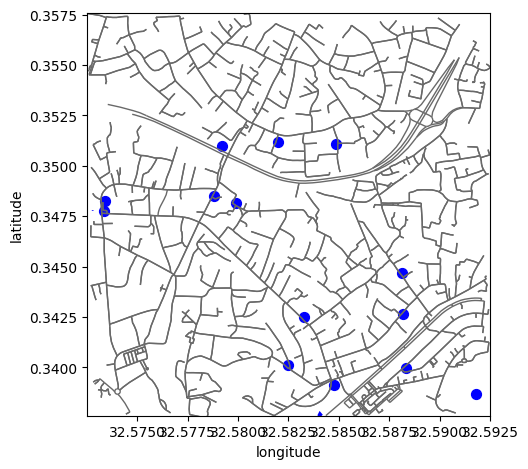

In [18]:
# Plot a subset of the POIs (e.g., tourist places)
# Create figure
fig, ax = plt.subplots()

# Plot the footprint
area.plot(ax=ax, facecolor="white")

# Plot street edges
edges.plot(ax=ax, linewidth=1, edgecolor="dimgray")

ax.set_xlim([west, east])
ax.set_ylim([south, north])
ax.set_xlabel("longitude")
ax.set_ylabel("latitude")

# Plot tourist places
tourist_places = pois[pois.tourism.notnull()]
tourist_places.plot(ax=ax, color="blue", alpha=1, markersize=50)
plt.tight_layout()

We have the POI information on all tourist places structured in a
geodataframe. To work with them in a machine learning algorithm, it will
be easier to convert them to a pandas DataFrame.

In [19]:
import pandas as pd

In [20]:
pois_df = pd.DataFrame(pois)
pois_df['latitude'] = pois_df.apply(lambda row: row.geometry.centroid.y, axis=1)
pois_df['longitude'] = pois_df.apply(lambda row: row.geometry.centroid.x, axis=1)

tourist_places_df = pois_df[pois_df.tourism.notnull()]
print(len(tourist_places_df))
tourist_places_df

16


geometry  \
element id                                                              
node    3032234586                           POINT (32.58834 0.33994)   
        4119308804                           POINT (32.58817 0.34264)   
        4942954054                            POINT (32.5918 0.33868)   
        5678162422                           POINT (32.58474 0.33914)   
        7743212629                           POINT (32.58812 0.34466)   
        8445011017                           POINT (32.57987 0.34816)   
        8456545033                           POINT (32.58329 0.34251)   
        8456545129                           POINT (32.57336 0.34773)   
        8481722617                            POINT (32.5734 0.34824)   
        8498971118                            POINT (32.57883 0.3485)   
        8597526517                           POINT (32.57918 0.35097)   
        8686698118                           POINT (32.58197 0.35119)   
        8686698119                           POINT (32.58485 0.35106)   
        8778105111                           POINT (32.58247 0.34012)   
way     437577068   POLYGON ((32.58394 0.33763, 32.58404 0.33783, ...   
        649469461   POLYGON ((32.57274 0.34776, 32.57274 0.3478, 3...   

                   addr:housenumber           addr:street             amenity  \
element id                                                                      
node    3032234586              NaN                   NaN                 NaN   
        4119308804              NaN                   NaN  mobile_money_agent   
        4942954054              NaN                   NaN                 NaN   
        5678162422              NaN                   NaN                 NaN   
        7743212629              NaN                   NaN                 NaN   
        8445011017              NaN      Kisingiri Street                 NaN   
        8456545033              NaN          Mawanda Road                 NaN   
        8456545129              NaN          Mawanda Road                 NaN   
        8481722617              NaN                   NaN                 NaN   
        8498971118              NaN                   NaN                 NaN   
        8597526517              NaN                   NaN                 NaN   
        8686698118              NaN          Oketcho Road                 NaN   
        8686698119              NaN           Kasubi Road                 NaN   
        8778105111          8HQJ+XW  New Mulago Gate Road                 NaN   
way     437577068           Plot 72            Kiira Road                 NaN   
        649469461               NaN                   NaN                 NaN   

                   cuisine                       name            phone  \
element id                                                               
node    3032234586     NaN                    Fat Cat  +256 771 393892   
        4119308804     NaN                Green apple              NaN   
        4942954054     NaN                Okrut Close              NaN   
        5678162422     NaN          Tagore Apartments              NaN   
        7743212629     NaN                        NaN              NaN   
        8445011017     NaN               Prisma Hotel       0414371122   
        8456545033     NaN          Silverline Condos              NaN   
        8456545129     NaN            Kida Guesthouse              NaN   
        8481722617     NaN           Koda Guest House              NaN   
        8498971118     NaN         Mulago Guest House              NaN   
        8597526517     NaN           Papa Guest house              NaN   
        8686698118     NaN          Silent Corner inn              NaN   
        8686698119     NaN           Kerona Dam Hotel              NaN   
        8778105111     NaN                 Nyumba 591    +256792172017   
way     437577068      NaN  Hilton Garden Inn Kampala  +256 31 3800800   
        649469461      NaN   

In [21]:
poi_counts = {}

poi_types =["amenity", "historic", "leisure", "shop", "tourism", "religion", "memorial"]

for tag in poi_types:
  if tag in pois_df.columns:
    poi_counts[tag] = pois_df[tag].notnull().sum()
  else:
    poi_counts[tag] = 0

poi_counts_df = pd.DataFrame(list(poi_counts.items()), columns=['POI Type', 'Count'])



poi_counts_df

,POI Type,Count
0,amenity,729
1,historic,0
2,leisure,20
3,shop,163
4,tourism,16
5,religion,7
6,memorial,0


## Assessing the Available OpenStreetMap Features

<span class="editsection-bracket"
style="">\[</span><span class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_datasets/includes/assessing-osm.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_datasets/includes/assessing-osm.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

In the course assessment you will be given the task of constructing a
prediction system for various indicators at a given location. We expect
that knowledge of the local region around the property should be helpful
in making those predictions. To evaluate this we will now look at
[OpenStreetMap](https://www.openstreetmap.org) as a data source.

In this section, you should follow the methodology used in the above
example to extract summary OSM information that can be useful in making
predictions about an area. Use code from the example to construct a
function that summarises the number of various points of interest in a
target area. You should write reusable code that allows you to explore
the characteristics of different points of interest.

In [22]:
def count_pois_near_coordinates(latitude: float, longitude: float, tags: dict, distance_km: float = 1.0) -> dict:
    """
    Count Points of Interest (POIs) near a given pair of coordinates within a specified distance.
    Args:
        latitude (float): Latitude of the location.
        longitude (float): Longitude of the location.
        tags (dict): A dictionary of OSM tags to filter the POIs (e.g., {'amenity': True, 'tourism': True}).
        distance_km (float): The distance around the location in kilometers. Default is 1 km.
    Returns:
        dict: A dictionary where keys are the OSM tags and values are the counts of POIs for each tag.
    """
    poi_counts = {}
    df = ox.features_from_point(center_point=(latitude,longitude), tags=tags, dist=distance_km*1000) # returns all pois in a circle with radius = distance_km in metres centered at center_point
    for feature in tags:
        if feature in df.columns:
            if tags[feature] == True:
                poi_counts[feature] = df[feature].notnull().sum()
            elif type(tags[feature]) == list:
                poi_counts[feature] = df[feature].isin(tags[feature]).sum()
        else:
            poi_counts[feature] = 0

    return poi_counts

count_pois_near_coordinates(0.347596, 32.582520, tags, 1.1)

{'amenity': 717,
 'buildings': 0,
 'historic': 0,
 'leisure': 20,
 'shop': 158,
 'tourism': 16,
 'religion': 7,
 'memorial': 0}

Now that you have written reusable code, choose the tags you want to
query. This should be different from the tags used in the example. You
can also search for specific tags like this:
`"amenity": ["university", ...`.

In [23]:
# Modify this dict
tags = {
    "amenity": ["university"],
    "historic": True,
    "leisure": True,
    "shop": True,
    "tourism": True,
    "religion": True,
}

Here there are 13 UK locations.

In [24]:
locations_dict = {
    "Cambridge": (52.2054, 0.1132),
    "Oxford": (51.7570, -1.2545),
    "Euston Square": (51.5246, -0.1340),
    "Temple": (51.5115, -0.1160),
    "Kensington": (51.4988, -0.1749),
    "Barnsley": (53.5526, -1.4797),
    "Mansfield": (53.1472, -1.1987),
    "Wakefield": (53.6848, -1.5039),
    "Sunderland": (54.9069, -1.3838),
    "Rotherham": (53.4300, -1.3568),
    "Doncaster": (53.5228, -1.1288),
    "Chesterfield": (53.2350, -1.4210),
    "Huddersfield": (53.6450, -1.7794)
    }

### Exercise 1

Use your code to query the OSM feature counts for each of them, and
combine them into one dataframe.

### Exercise 1 Answer

Write your answer to Exercise 1 here

In [25]:
# Use this box for any code you need

poi_counts_example = count_pois_near_coordinates(0.347596, 32.582520, tags, 1.1)

poi_counts_df_example = pd.DataFrame(list(poi_counts.items()), columns=['POI Type', 'Count'])
poi_counts_df_example

,POI Type,Count
0,amenity,729
1,historic,0
2,leisure,20
3,shop,163
4,tourism,16
5,religion,7
6,memorial,0


### Exercise 2

Use k-means clustering or another clustering method to try to find
clusters of similar areas, based on nearby OSM features.

### Exercise 2 Answer

Write your answer to Exercise 2 here

In [26]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [27]:
# Use this box for any code you need
tags = {
    "amenity": True,
    "buildings": True,
    "historic": True,
    "leisure": True,
    "shop": True,
    "tourism": True,
    "religion": True,
    "memorial": True
}

data = {feature:[] for feature in tags}
data['City'] = []
for city in locations_dict:
    poi_counts = count_pois_near_coordinates(locations_dict[city][0], locations_dict[city][1], tags)
    data['City'].append(city)
    for feature in tags:
        data[feature].append(poi_counts[feature])

pd_data = pd.DataFrame(data)
pd_data = pd_data[['City'] + [col for col in pd_data.columns if col != 'City']] # reorders to make City the first column
pd_data

,City,amenity,buildings,historic,leisure,shop,tourism,religion,memorial
0,Cambridge,1687,0,36,305,350,131,61,21
1,Oxford,1477,0,79,309,388,139,74,44
2,Euston Square,3095,0,172,181,796,286,42,158
3,Temple,3295,0,204,156,952,306,42,152
4,Kensington,1610,0,88,170,515,179,29,82
5,Barnsley,452,0,5,96,344,13,11,2
6,Mansfield,454,0,13,65,341,14,30,10
7,Wakefield,641,0,5,89,518,19,25,3
8,Sunderland,846,0,7,49,270,34,31,5
9,Rotherham,299,0,1,52,186,6,13,0


In [28]:
features = pd_data[["amenity", "buildings", "historic", "leisure", "shop", "tourism", "religion", "memorial"]]
kmeans = KMeans(n_clusters=3).fit(features)

cluster_df = pd.DataFrame({"City": pd_data["City"], "Cluster": kmeans.labels_})
cluster_df

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,City,Cluster
0,Cambridge,0
1,Oxford,0
2,Euston Square,2
3,Temple,2
4,Kensington,0
5,Barnsley,1
6,Mansfield,1
7,Wakefield,1
8,Sunderland,1
9,Rotherham,1


### Exercise 3

Investigate the locations yourself, and assign them categories based on
your interpretation. Visualise and compare your manual assignments
against your clustering results.

### Exercise 3 Answer

Write your answer to Exercise 3 here

I would personally also classify (Euston Square, Temple), (Cambridge, Oxford, Kensington) and (all other cities) as my three clusters. This can be seen from the fact that the first cluster has about 3000 amenities, the second has about 1500 amenities and the last has below 1000. A similar pattern follows for "historic", "shop", "tourism" and "memorial" columns.

Let us examine the clusters when we plot in 2D space. I deliberately removed the zero vector features (such as "buildings").

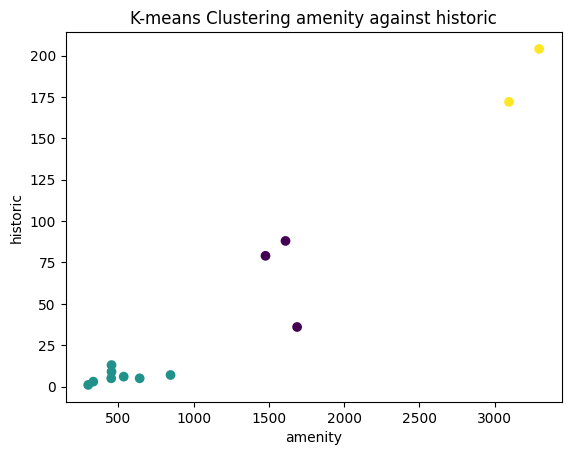

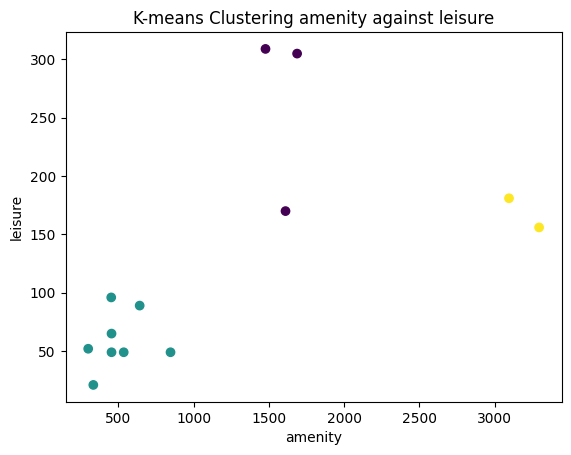

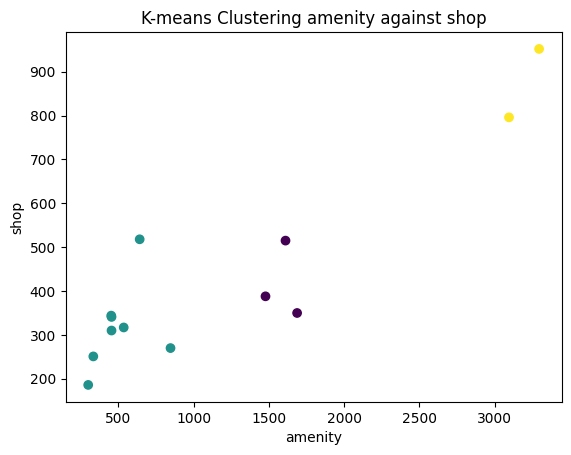

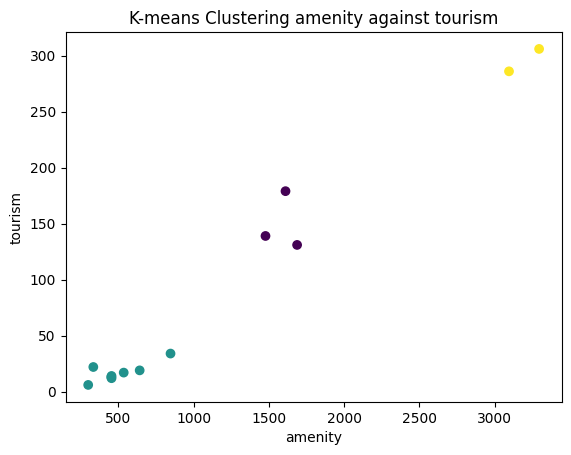

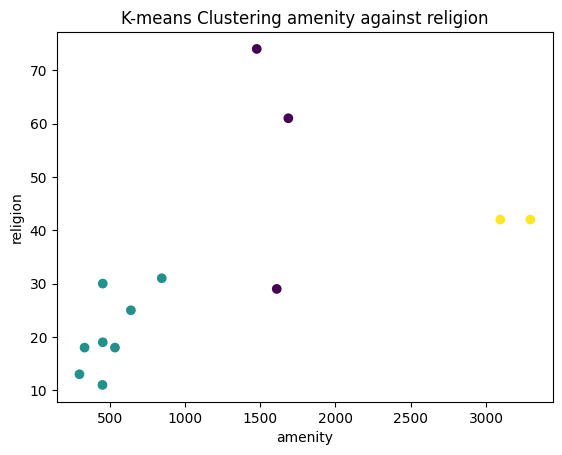

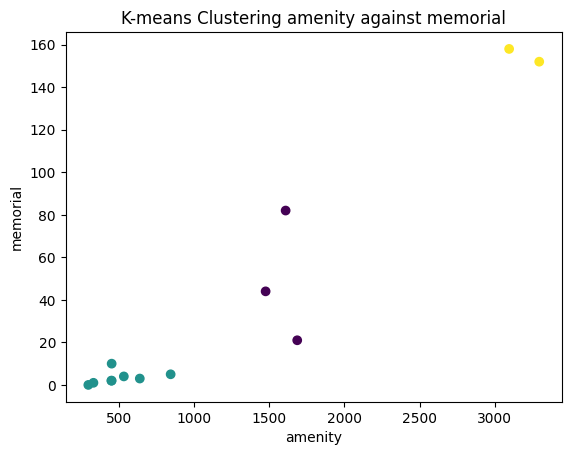

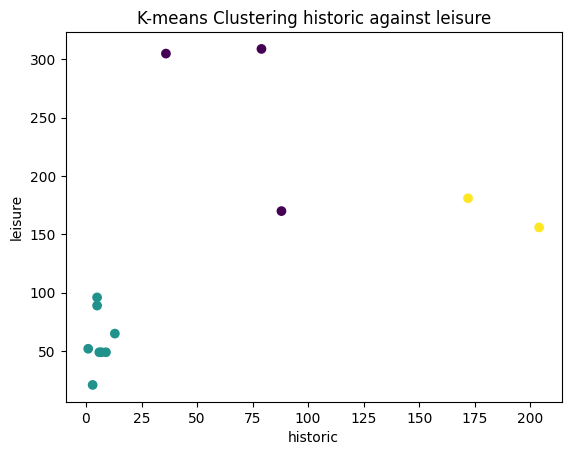

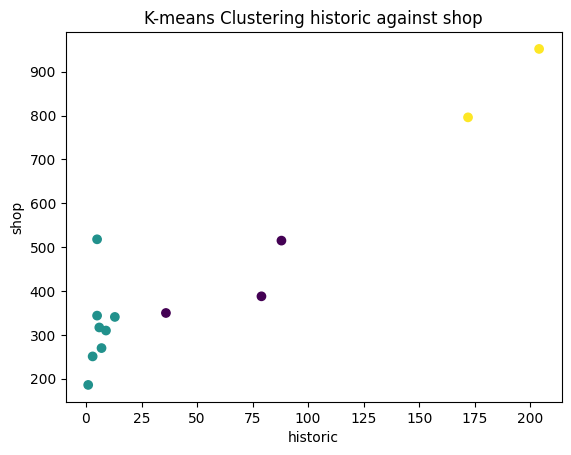

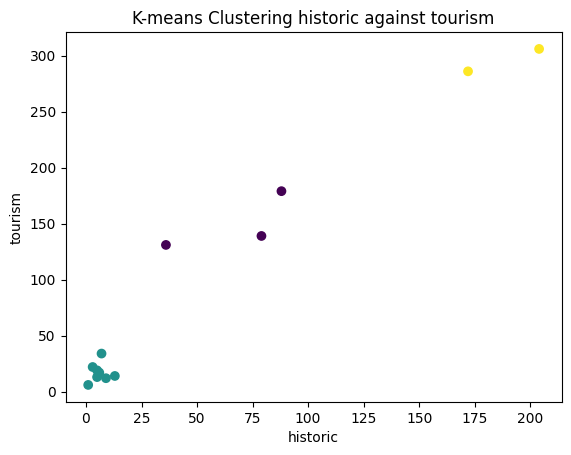

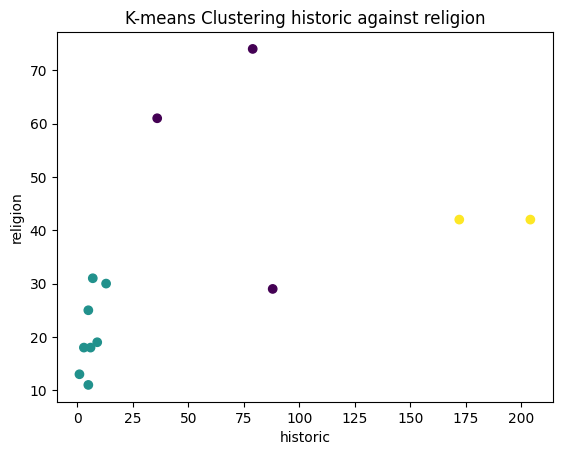

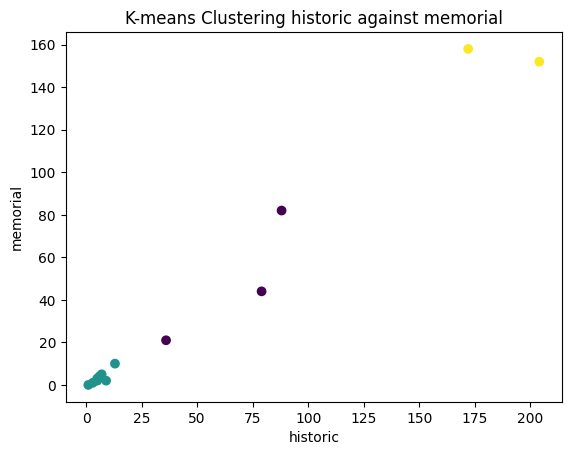

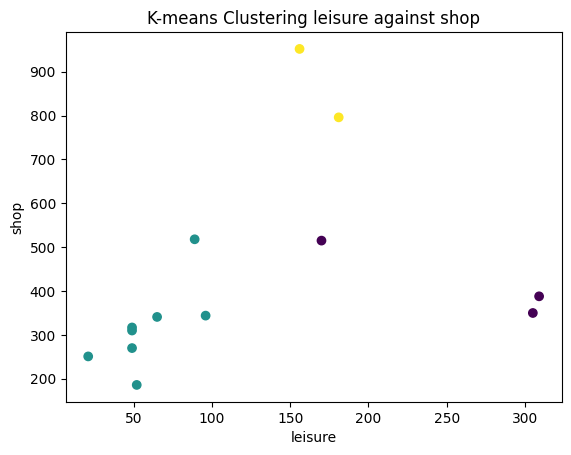

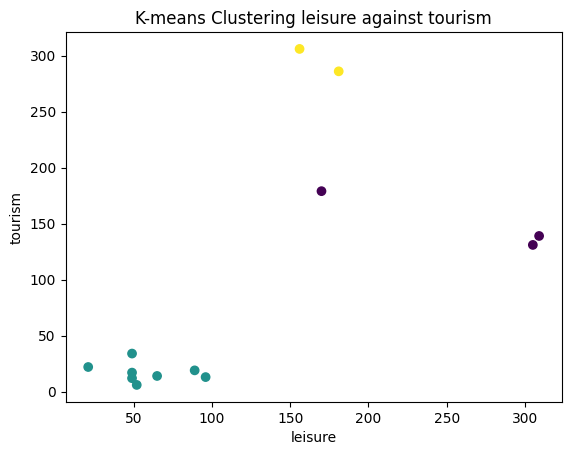

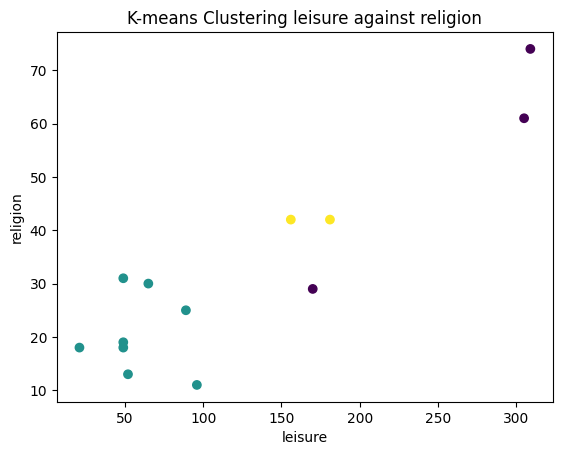

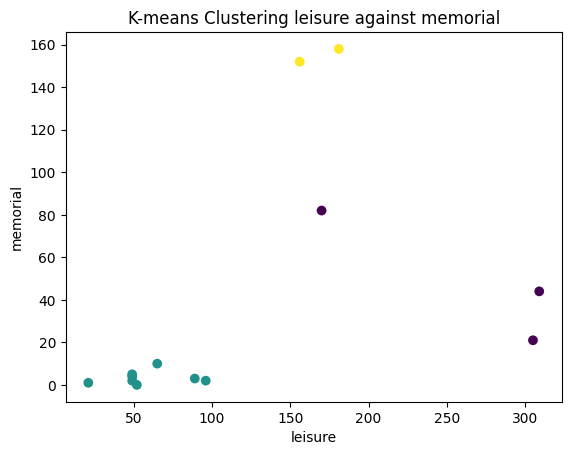

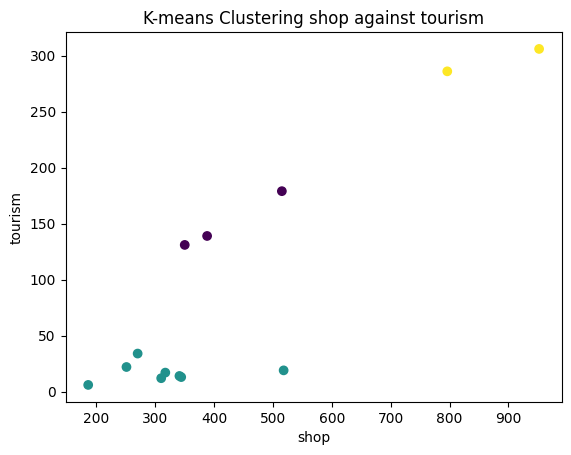

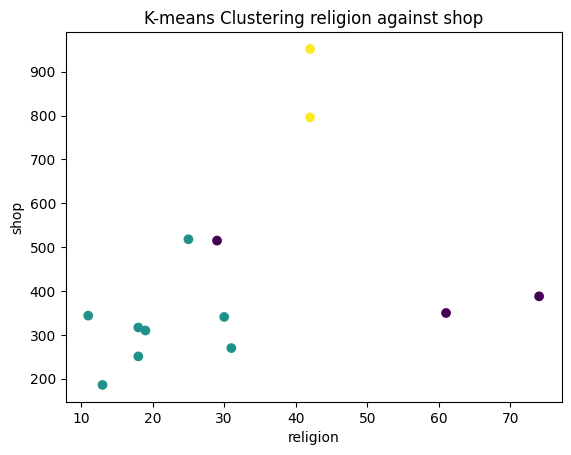

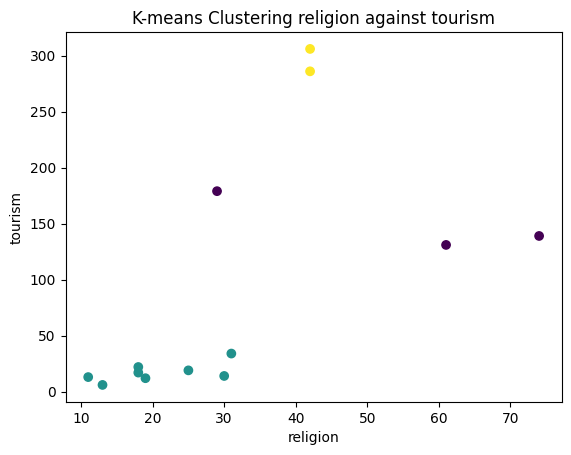

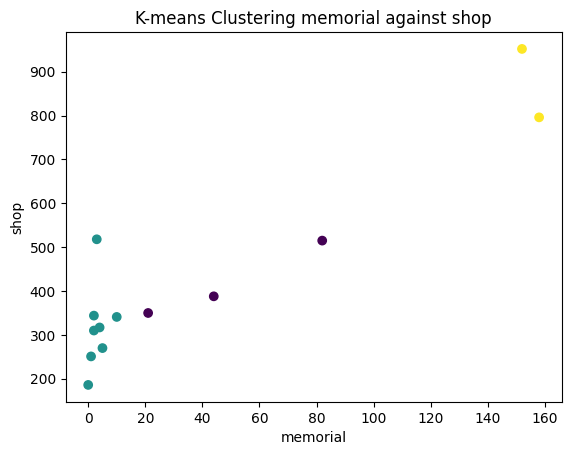

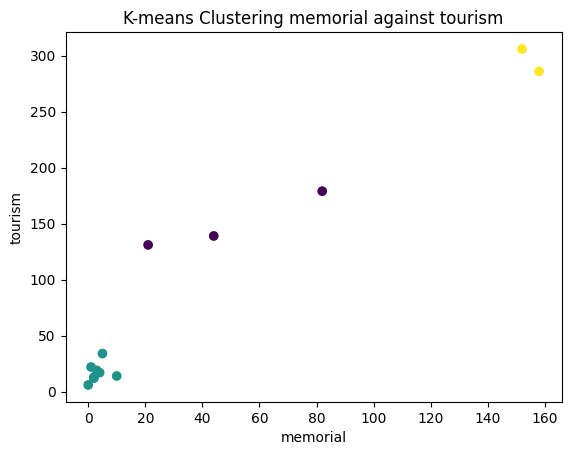

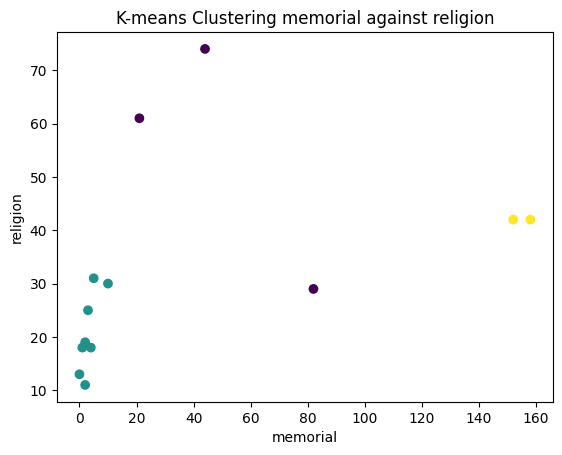

In [29]:
for feature1 in tags:
    for feature2 in tags:
        if feature1 < feature2 and pd_data[feature1].sum() != 0 and pd_data[feature2].sum() != 0:
            plt.scatter(pd_data[feature1], pd_data[feature2], c=cluster_df["Cluster"])
            plt.xlabel(feature1)
            plt.ylabel(feature2)
            plt.title("K-means Clustering " + feature1 + " against " + feature2)
            plt.show()

As my manual assignment is the same as the K-means clustering algorithm's, we observe that both have a high confidence of agreement that the clustering is correct. In any of the above 21 plots of two features against each other, each coloured point is reasonably closely grouped with those of similar colours. Although a manual assignment on the plots is difficult (since one assignment affects the assignment on other plots), the assignment based on just looking at pd_data clearly clusters the cities in a way that most would cluster the individual plots.

### Exercise 4

Normalise your dataframe and compute a distance matrix for the
locations. Visualise it, and compare the outcode with your previous
clustering results.

### Exercise 4 Answer

Write your answer to Exercise 4 here

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances
import seaborn as sns

In [31]:
# Use this box for any code you need

features = pd_data.drop(columns='City') # extract only columns with integers

scaler = StandardScaler()
normalised_data = scaler.fit_transform(features) # normalises the data frame such that each value is adjusted to the values in the feature column.
distance_matrix = pairwise_distances(normalised_data)
distance_df = pd.DataFrame(distance_matrix, index=pd_data["City"], columns=pd_data["City"])
distance_df

City,Cambridge,Oxford,Euston Square,Temple,Kensington,Barnsley,Mansfield,Wakefield,Sunderland,Rotherham,Doncaster,Chesterfield,Huddersfield
City,,,,,,,,,,,,,
Cambridge,0.000000,1.097609,4.694003,5.420275,2.818675,3.998416,3.560353,3.559487,3.525803,4.359840,4.322587,4.028545,4.033827
Oxford,1.097609,0.000000,4.442101,5.133746,3.081335,4.683234,4.105704,4.155645,4.123281,5.015302,4.928128,4.656638,4.647800
Euston Square,4.694003,4.442101,0.000000,0.967391,3.025430,6.075484,5.807053,5.548618,5.799965,6.563748,6.355473,6.045048,6.100268
Temple,5.420275,5.133746,0.967391,0.000000,3.729112,6.664097,6.400779,6.078680,6.412119,7.180054,6.937952,6.625499,6.679529
Kensington,2.818675,3.081335,3.025430,3.729112,0.000000,3.150474,2.978994,2.794680,3.011500,3.649614,3.507847,3.183413,3.234961
Barnsley,3.998416,4.683234,6.075484,6.664097,3.150474,0.000000,1.121427,1.147547,1.346509,0.907055,1.010308,0.659082,0.695355
Mansfield,3.560353,4.105704,5.807053,6.400779,2.978994,1.121427,0.000000,0.951234,0.597365,1.238967,0.958063,0.718246,0.669413
Wakefield,3.559487,4.155645,5.548618,6.078680,2.794680,1.147547,0.951234,0.000000,1.311945,1.782743,1.537629,1.114157,1.138756
Sunderland,3.525803,4.123281,5.799965,6.412119,3.011500,1.346509,0.597365,1.311945,0.000000,1.245534,0.955696,0.834004,0.828040


The similarity scores may not be very intuitive to us at first glance, so let us use a heat map to find similarities.

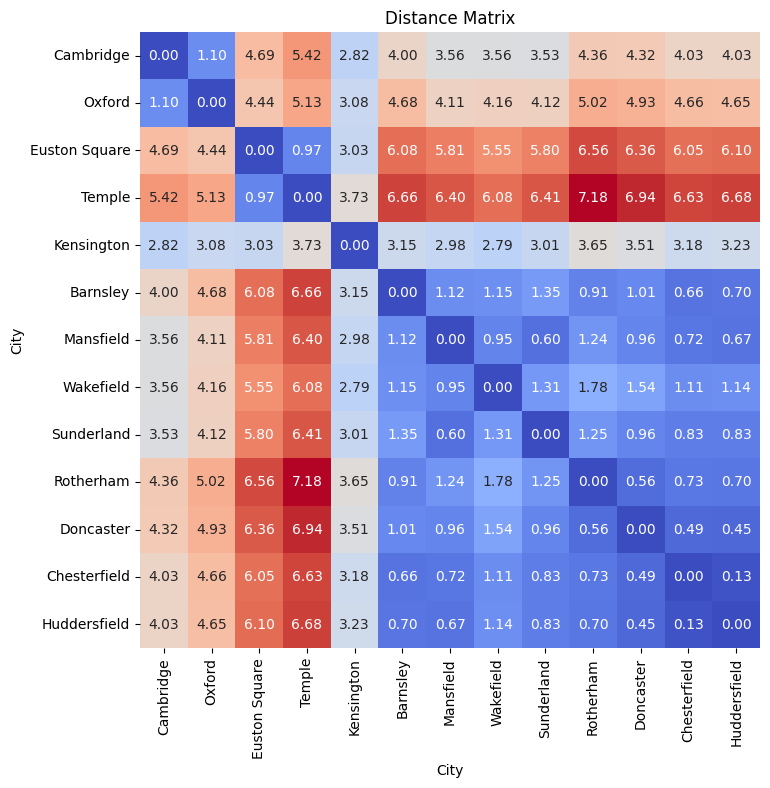

In [32]:
plt.figure(figsize=(8, 8))
sns.heatmap(distance_df, annot=True, cmap='coolwarm', fmt=".2f", cbar=False)
plt.title("Distance Matrix")
plt.show()

This closely relates to my clusters in Exercises 2-3. Here, the distance matrix cell is blue with low distance for two locations that are very similar; the cell is red with high distnace for two locations that are very different. Claerly Cambridge and Oxford belong to the same cluster, Euston and Temple belong to the same cluster, and with the exception of Kensington, the other cities all belong to the sam cluster (as can be seen by the large 8x8 blue square on the bottom right).

However, it appears that Kensington is not as similar to Cambridge and Oxford as we previously thought. While it does share the lowest score with Cambridge and Oxford (2.84 and 3.12), it is still quite close to the Euston Square and Temple cluster (3.02 and 3.72), and the last cluster (with an average slightly above 3). Hence Kensington is the only city that might have ambiguity in finding its cluster. If we used k=4 in our K-means clustering, it will probably belong to its own (fourth) cluster.

### Exercise 5

Which features you included were correlated among each other?
Investigate and plot a feature correlation matrix. What do these results
say about your feature selection?

### Exercise 5 Answer

Write your answer to Exercise 5 here

In [33]:
# Use this box for any code you need

features_df = pd_data.drop(columns="City").corr()
features_df

,amenity,buildings,historic,leisure,shop,tourism,religion,memorial
amenity,1.000000,NaN,0.968495,0.594537,0.899708,0.987120,0.581497,0.956465
buildings,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
historic,0.968495,NaN,1.000000,0.496392,0.922939,0.977946,0.489348,0.986070
leisure,0.594537,NaN,0.496392,1.000000,0.348070,0.611229,0.903724,0.433301
shop,0.899708,NaN,0.922939,0.348070,1.000000,0.881309,0.327359,0.920596
tourism,0.987120,NaN,0.977946,0.611229,0.881309,1.000000,0.575508,0.968986
religion,0.581497,NaN,0.489348,0.903724,0.327359,0.575508,1.000000,0.406251
memorial,0.956465,NaN,0.986070,0.433301,0.920596,0.968986,0.406251,1.000000


Clearly there are NaN values because "buildings" was a zero vector. If we remove it, we can plot a heat map again.

In [34]:
features_df_filter = features_df.loc[:, features_df.sum() != 0]
features_df_filtered = features_df_filter.loc[features_df_filter.sum(axis=1) != 0]
features_df_filtered

,amenity,historic,leisure,shop,tourism,religion,memorial
amenity,1.000000,0.968495,0.594537,0.899708,0.987120,0.581497,0.956465
historic,0.968495,1.000000,0.496392,0.922939,0.977946,0.489348,0.986070
leisure,0.594537,0.496392,1.000000,0.348070,0.611229,0.903724,0.433301
shop,0.899708,0.922939,0.348070,1.000000,0.881309,0.327359,0.920596
tourism,0.987120,0.977946,0.611229,0.881309,1.000000,0.575508,0.968986
religion,0.581497,0.489348,0.903724,0.327359,0.575508,1.000000,0.406251
memorial,0.956465,0.986070,0.433301,0.920596,0.968986,0.406251,1.000000


Plot a heat map again.

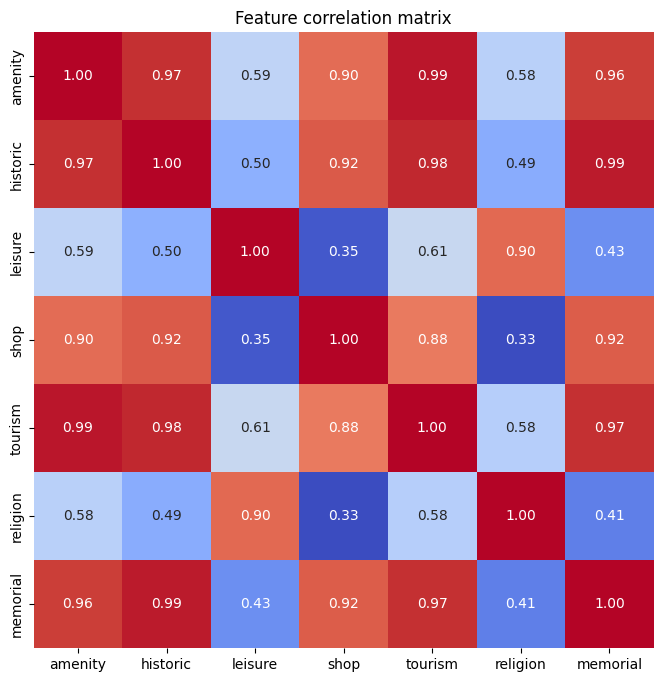

In [35]:
plt.figure(figsize=(8, 8))
sns.heatmap(features_df_filtered, annot=True, cmap='coolwarm', fmt=".2f", cbar=False)
plt.title("Feature correlation matrix")
plt.show()

The numbers here are slightly different from Exercise 4 -- while a distance matrix uses 0.0 for similarity (lowest distance) and increasing numbers for dissimilarity (highest distance), a feature correlation matrix uses 1.0 for perfect similarity and 0.0 for zero similarity.

Here the colours are confusing, so let us arrange this in decreasing similarity:

<Axes: >

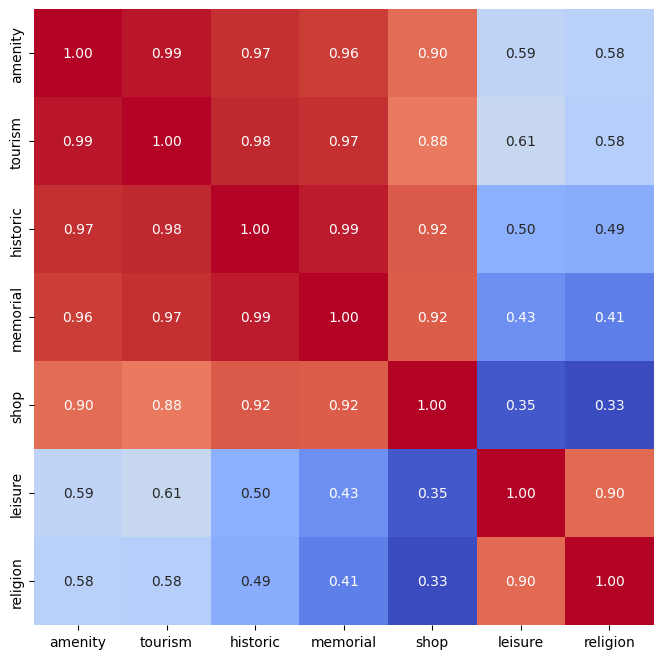

In [36]:
features_df_filtered_sorted = features_df_filtered.sort_values(by=list(features_df_filtered.columns), axis=1, ascending=False)
features_df_filtered_sorted = features_df_filtered_sorted.sort_values(by=list(features_df_filtered_sorted.index), axis=0, ascending=False)

plt.figure(figsize=(8,8))
sns.heatmap(features_df_filtered_sorted, annot=True, cmap='coolwarm', fmt=".2f", cbar=False)

It is clear that (amenity, tourism, historic, memorial, shop) belong to the same cluster, and (leisure, religion) to another if we cluster into two groups. This is because leisure and religion clearly are only red (high similarity) with each other, while the rest are only red in their own cluster.

Contextually, this means cities in the UK that have leisure POIs are likely to have religion POIs also, and fewer for the rest. In similar fashion, cities with amenity, tourism, historic, memorial and shop POIs are likely to have similar POIs, and fewer of leisure and religion POIs.

## Joining Spatial Data

<span class="editsection-bracket"
style="">\[</span><span class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_access/includes/spatial-join.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_access/includes/spatial-join.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

### Matching OpenStreetMap and House Prices data

In this exercise you will download the geographies of houses from
OpenStreetMap and map them to visualise the records you see in the house
price dataset. This is a data linking and validation exercise.

The latitude and longitude of Cambridge are as follows:

In [37]:
place_name = "Cambridge"
latitude = 52.1951
longitude = 0.1313

We want to execute an SQL query on your database to select all houses in
a 1km x 1km region around the centre of Cambridge that have been part of
housing transactions since 2020.

This operation can take a very long time. This is because the table is
not indexed on coordinate data, and therefore the query has to check
tens of millions of rows. This can be fixed by constructing an index on
the `latitude` and `longitude` values, using `BTREE` to make a joint
index. *Note that indexing can take a long time.* Consider also indexing
your table by other variables you might find useful later.

### Exercise 6

Index the table on the coordinate data using a `BTREE` and index other
columns you might find useful.

### Exercise 6 Answer

Write your answer to Exercise 6 here

In [4]:
%pip install pymysql
%pip uninstall --yes fynesse
%pip install git+https://github.com/chenyilow/cyl68_ads_2024.git # pulls the fynesse library from GitHub
import fynesse

Note: you may need to restart the kernel to use updated packages.
Found existing installation: fynesse 0.1.0
Uninstalling fynesse-0.1.0:
  Successfully uninstalled fynesse-0.1.0
Note: you may need to restart the kernel to use updated packages.
  Cloning https://github.com/chenyilow/cyl68_ads_2024.git to /private/var/folders/fy/97g30xls3yz3m9r4smbtz2qr0000gn/T/pip-req-build-2acd0qoz
  Running command git clone --filter=blob:none --quiet https://github.com/chenyilow/cyl68_ads_2024.git /private/var/folders/fy/97g30xls3yz3m9r4smbtz2qr0000gn/T/pip-req-build-2acd0qoz
  Resolved https://github.com/chenyilow/cyl68_ads_2024.git to commit 3c2f2f634faf1481b9cac5fb53ac2dab10ed6ac8
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


  Created wheel for fynesse: filename=fynesse-0.1.0-py3-none-any.whl size=8405 sha256=4d86e9b3f4422ac151aeb0f10e9d000b7a9de68fe2f40de4b2e07952587c47f3
  Stored in directory: /private/var/folders/fy/97g30xls3yz3m9r4smbtz2qr0000gn/T/pip-ephem-wheel-cache-nod7ijan/wheels/ed/1b/50/e88ba8b881e3b2b6a370f6dbbfe3c488736896bb12bc810ce9
Successfully built fynesse
Note: you may need to restart the kernel to use updated packages.


In [39]:
%pip install ipython-sql
%reload_ext sql
%config SqlMagic.style = '_DEPRECATED_DEFAULT'

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 1.8 MB/s eta 0:00:00a 0:00:01m
Note: you may need to restart the kernel to use updated packages.


In [1]:
import yaml
from ipywidgets import interact_manual, Text, Password
@interact_manual(username=Text(description="Username:"),
                password=Password(description="Password:"),
                url=Text(description="URL:"),
                port=Text(description="Port:"))
def write_credentials(username, password, url, port):
    with open("credentials.yaml", "w") as file:
        credentials_dict = {'username': username,
                           'password': password,
                           'url': url,
                           'port': port}
        yaml.dump(credentials_dict, file)

interactive(children=(Text(value='', continuous_update=False, description='Username:'), Password(continuous_up…

In [2]:
with open("credentials.yaml") as file:
  credentials = yaml.safe_load(file)
username = credentials["username"]
password = credentials["password"]
url = credentials["url"]
port = credentials["port"]

In [5]:
conn = fynesse.access.create_connection(username, password, url, "ads_2024", 3306)

Connection established!


In [44]:
%sql mariadb+pymysql://$username:$password@$url?local_infile=1

First, we have to populate prices_coordinates_data from 1996 to 2024. This took too long (2 years of data took more than an hour), so I made do with data from 2022-2024.

In [45]:
# Use this box for any code you need

for year in range(2024, 1995, -1):
    fynesse.access.housing_upload_join_data(conn, year)

Selecting data for year: 2024
Storing data for year: 2024
Data stored for year: 2024
Selecting data for year: 2023
Storing data for year: 2023
Data stored for year: 2023
Selecting data for year: 2022
Storing data for year: 2022
Data stored for year: 2022
Selecting data for year: 2021
Storing data for year: 2021
Data stored for year: 2021
Selecting data for year: 2020
Storing data for year: 2020
Data stored for year: 2020
Selecting data for year: 2019


OperationalError: (2013, 'Lost connection to MySQL server during query ([Errno 54] Connection reset by peer)')

In [50]:
for year in range(2019, 2014, -1):
    fynesse.access.housing_upload_join_data(conn, year)

Selecting data for year: 2019
Storing data for year: 2019
Data stored for year: 2019
Selecting data for year: 2018
Storing data for year: 2018
Data stored for year: 2018
Selecting data for year: 2017
Storing data for year: 2017


AttributeError: 'NoneType' object has no attribute 'settimeout'

In [ ]:
for year in range(2017, 2014, -1):
    fynesse.access.housing_upload_join_data(conn, year)

Selecting data for year: 2017


In [ ]:
for year in range(2009, 2004, -1):
    fynesse.access.housing_upload_join_data(conn, year)

In [ ]:
for year in range(2004, 1999, -1):
    fynesse.access.housing_upload_join_data(conn, year)

In [ ]:
for year in range(1999, 1994, -1):
    fynesse.access.housing_upload_join_data(conn, year)

In [ ]:
%%sql

USE `ads_2024`;
CREATE INDEX idx_lat_lon ON prices_coordinates_data(latitude, longitude);

### Exercise 7

Write an SQL query on your database to select all houses in a 1km x 1km
region around the centre of Cambridge that have been part of housing
transactions since 2020.

### Exercise 7 Answer

Write your answer to Exercise 7 here

Since 1 degree is about 111km, then 1km is 1/111 degree. Our bounding box will fit the coordinates.

In [ ]:
# Use this box for any code you need

latitude, longitude = locations_dict["Cambridge"]
kilometer = 2/111
north = latitude + kilometer/2
south = latitude - kilometer/2
west = longitude - kilometer/2
east = longitude + kilometer # I have modified this slightly so that the picture looks more squarish later
date_threshold = '2019-12-31'

In [ ]:
%%sql

USE `ads_2024`;
SELECT * FROM prices_coordinates_data WHERE date_of_transfer > :date_threshold AND latitude > $south AND latitude < $north AND longitude > $west AND longitude < $east LIMIT 20;

### Exercise 8

Get information about all the buildings in that area from OpenStreetMaps
(`'building': True`). You will need their address information
(`addr:housenumber`, `addr:street`, `addr:postcode`, …) and geometry
polygon (`geometries_from_bbox`). Construct a dataframe that lists all
OSM buildings in the area that have a full address, along with their
area (in square meters). Plot a map of the area, using color to mark the
buildings with addresses and the ones without.

### Exercise 8 Answer

Write your answer to Exercise 8 here

In [ ]:
# Use this box for any code you need

import geopandas as gpd

tags_buildings = {"building": True}
pois_buildings = ox.geometries_from_bbox(north, south, east, west, tags_buildings)
full_address_pois = pois_buildings[pois_buildings[["addr:housenumber", "addr:street", "addr:postcode"]].notna().all(axis=1)]
no_address_pois = pois_buildings[pois_buildings[["addr:housenumber", "addr:street", "addr:postcode"]].isna().any(axis=1)]

In [ ]:
full_address_pois

In [ ]:
no_address_pois

In [ ]:
graph = ox.graph_from_bbox(north, south, east, west)

# Retrieve nodes and edges
nodes, edges = ox.graph_to_gdfs(graph)

# Get place boundary related to the place name as a geodataframe
area = ox.geocode_to_gdf("Cambridge")

fig, ax = plt.subplots()

# Plot the footprint
area.plot(ax=ax, facecolor="white")

# Plot street edges
edges.plot(ax=ax, linewidth=1, edgecolor="dimgray")

ax.set_xlim([west, east])
ax.set_ylim([south, north])
ax.set_xlabel("longitude")
ax.set_ylabel("latitude")

# Plot all POIs
full_address_pois.plot(ax=ax, color="blue", alpha=0.7, markersize=10)
no_address_pois.plot(ax=ax, color="green", alpha=0.7, markersize=10)
plt.tight_layout()
plt.show()

In [ ]:
gdf = gpd.GeoDataFrame(full_address_pois, geometry='geometry')
gdf.set_crs('EPSG:4326', inplace=True)
gdf = gdf.to_crs(epsg=27700)
gdf['area'] = gdf['geometry'].apply(lambda x: x.area if x.geom_type == 'Polygon' else None)
gdf = gdf[["name", "addr:housenumber", "addr:street", "addr:postcode", "area"]]

### Exercise 9

Match the houses you found in the price paid dataset with the buildings
on OpenStreetMaps based on their addresses. Can this be applied to all
building types? Are there any PP transactions which you couldn’t match
to an OSM building, or any OSM buildings you coulnd’t match to a PP
transaction? If so, what could be the reason for this? Do you employ any
techniques to find non-exact matches? If yes, what matches would you
have missed without it? Are you encountering false positive matches? Use
this address matching to merge the two dataframes.

### Exercise 9 Answer

Write your answer to Exercise 9 here

In [ ]:
%%sql

CREATE TABLE IF NOT EXISTS `osm_data` (
  `name` VARCHAR(255) DEFAULT NULL,
  `housenumber` VARCHAR(50) DEFAULT NULL,
  `street` VARCHAR(255) DEFAULT NULL,
  `postcode` VARCHAR(20) DEFAULT NULL,
  `area` FLOAT DEFAULT NULL
);

In [ ]:
gdf.to_csv('osm_data.csv', index=False)

In [ ]:
%%sql

LOAD DATA LOCAL INFILE "./osm_data.csv" INTO TABLE `osm_data` FIELDS TERMINATED BY ',' OPTIONALLY ENCLOSED by '"' LINES STARTING BY '' TERMINATED BY '\n';

In [ ]:
%%sql

USE `ads_2024`;
SELECT * FROM `osm_data` LIMIT 20;

In [ ]:
%%sql

USE `ads_2024`;
SELECT * FROM prices_coordinates_data LIMIT 5;

In [ ]:
%%sql

USE `ads_2024`;
SELECT *
FROM prices_coordinates_data
JOIN osm_data
  ON osm_data.postcode = prices_coordinates_data.postcode
JOIN pp_data
  ON osm_data.housenumber = pp_data.primary_addressable_object_name
  AND osm_data.street = pp_data.street;

Disclaimer: I cannot work past this step because of some KeyError: "DEFAULT" that I cannot solve for the past 5 hours. I can give a summary of the steps to take for this exercise.

Under the %sql environment, I should create a table for `osm_data` and join it with `pp_data` under osm_data.addr:housenumber = pp_data.primary_addressable_object_name, osm_data.addr:street = pp_data.street, and osm_data.addr:postcode = pp_data.postcode.

I would expect there to be mismatches. Trivially, it could be due to spelling errors or name changes of the address, but there could also be the creation or demolishing of buildings which makes transactions in `pp_data` (which dates back many years) to mismatch with the current day `osm_data`.

Non-exact matches such as extra spacing or upper/lowercase or extra punctuation could still be found if we give it a slight tolerance (and we should, since addresses are prone to such differences). One can use the fuzzywuzzy library for a pattern match.

However, the caveat is that there might be false positives for tolerating mispellings. For example, Street 1 and Street 1a are completely different, yet they may be interpreted as the same address. It is difficult for a machine to disambiguate what constitutes a distinct address from another.

### Exercise 10

Examine the relationship between the price and area of a property. -
What other variables do you need to account for? - Is the correlation as
strong as you would expect? - What factors could be impacting this?

Visualise the relationships you found.

### Exercise 10 Answer

Write your answer to Exercise 10 here

In [ ]:
# Use this box for any code you need

For the same reasons as above, I am unable to access the database.

I would expect the relationship to be high, since each plot of land is valuable. However, there are other variables, such as distance from POIs, age of building, distance from city center etc., which probably requires a feature correlation matrix (as in Exercise 5) so we can see if price and area indeed have the highest similarity compared to other features.

Demonstrate the reusability of your code by executing the same analysis
for Oxford.

In [ ]:
place_name = "Oxford"

latitude = 51.7520
longitude = -1.2577

### Exercise 11

Replicating the same analysis for Oxford. You do not need to answer all
the questions again, but you should show that your code works for this
new input without the need to modify it. You should use the Fynesse
library for this. Finish by plotting a map of the area and the
correlation you find.

### Exercise 11 Answer

Write your answer to Exercise 11 here

In [ ]:
# Use this box for any code you need

fynesse.access.map(latitude, longitude)

## Conclusions

You should find some of the code you wrote above useful in your final
assessment. Make sure you wrote the code to be reusable and efficient,
and do include it in your Fynesse library. The functions you are
particularly likely to reuse are the OSM feature search, and map
visualisation functions.

### Exercise 12

Add relevant code to your Fynesse library. Demonstrate this was
successful by installing your library below and calling at least two
example functions.

### Exercise 12 Answer

Write your answer to Exercise 12 here

In [ ]:
# Use this box for any code you need

locations_dict = {
    "Cambridge": (52.2054, 0.1132),
    "Oxford": (51.7570, -1.2545),
    "Euston Square": (51.5246, -0.1340),
    "Temple": (51.5115, -0.1160),
    "Kensington": (51.4988, -0.1749),
    "Barnsley": (53.5526, -1.4797),
    "Mansfield": (53.1472, -1.1987),
    "Wakefield": (53.6848, -1.5039),
    "Sunderland": (54.9069, -1.3838),
    "Rotherham": (53.4300, -1.3568),
    "Doncaster": (53.5228, -1.1288),
    "Chesterfield": (53.2350, -1.4210),
    "Huddersfield": (53.6450, -1.7794)
    }

tags = {
    "amenity": True,
    "buildings": True,
    "historic": True,
    "leisure": True,
    "shop": True,
    "tourism": True,
    "religion": True,
    "memorial": True
}

In [ ]:
fynesse.access.count_pois_near_coordinates(1.290270, 103.851959, tags)

In [ ]:
fynesse.access.kmeans_clustering(locations_dict, tags)

## Thanks!

For more information on these subjects and more you might want to check
the following resources.

-   book: [The Atomic
    Human](https://www.penguin.co.uk/books/455130/the-atomic-human-by-lawrence-neil-d/9780241625248)
-   twitter: [@lawrennd](https://twitter.com/lawrennd)
-   podcast: [The Talking Machines](http://thetalkingmachines.com)
-   newspaper: [Guardian Profile
    Page](http://www.theguardian.com/profile/neil-lawrence)
-   blog:
    [http://inverseprobability.com](http://inverseprobability.com/blog.html)

## References